# Steps Analysis (02/17/17 - 10/24/18)

In [223]:
from main_clean_function import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
df = main_clean_function('./data/export.xml')

Total Rows = 27755
Total Steps = 4952676
start_date != end_date: 144


/home/guess/Steps_Analysis/all_functions.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.reset_index(inplace=True)


Total Rows = 27660
Total Steps = 4952676
start_date != end_date: 139
Total Rows = 27739
Total Steps = 4952676.0
start_date != end_date: 0
Total Rows = 27739
Total Steps = 4952676.0
start_date != end_date: 0
Total Rows = 24901
Total Steps = 4599072.0
start_date != end_date: 0
Total Rows = 24901
Total Steps = 4599072.0
start_date != end_date: 0
Total Rows = 24898
Total Steps = 4316394.0
start_date != end_date: 0
Total Rows = 24898
Total Steps = 4316394.0
start_date != end_date: 0
Total Rows = 24897
Total Steps = 4316378.0
start_date != end_date: 0
Total Rows = 24897
Total Steps = 4316378.0
start_date != end_date: 0


In [268]:
df.columns

Index(['start_date', 'start_time', 'end_date', 'end_time', 'num_steps',
       'duration', 'source'],
      dtype='object')

In [242]:
summed_df = df.groupby(by=['start_date', 'end_date']).sum()
summed_df['steps_per_hour'] = summed_df['num_steps']/summed_df['duration']
# summed_df.reset_index(inplace=True)

In [271]:
def drop_change_rename_df(df, x, col_rnm, drc=['start_time', 'end_time', 'source']):
    df.drop(index=[range(x-1)], inplace=True).reset_index()
    df['end_date'] = m_df['start_date'] - pd.Timedelta(x, unit='D')
    df.rename(columns={'num_steps': col_rnm+'num_steps', 'duration': col_rnm+'duration'})
    if type(drc) == list and len(drc) > 0:
        df.drop(columns=drc)
    return df

In [266]:
def rolling_day_df(df, x):
    m_df = df.rolling(x).mean()
    md_df = df.rolling(x).median()
    std_df = df.rolling(x).std()
    s_df = df.rolling(x).sum()

    m_df = drop_change_rename_df(m_df, x, 'mean_')
    md_df = drop_change_rename_df(md_df, x, 'median_')
    std_df = drop_change_rename_df(std_df, x, 'std_')
    s_df = drop_change_rename_df(s_df, x, 'total_')
    
    merged_df = pd.merge(m_df, md_df, std_df, s_df)

In [267]:
rolling_day_df(summed_df, 30, mean)

NameError: name 'mean' is not defined

In [254]:
summed_df.rolling(30).std()

,,start_time,end_time,num_steps,duration,steps_per_hour
start_date,end_date,,,,,
2017-02-17,2017-02-17,NaN,NaN,NaN,NaN,NaN
2017-02-18,2017-02-18,NaN,NaN,NaN,NaN,NaN
2017-02-19,2017-02-19,NaN,NaN,NaN,NaN,NaN
2017-02-20,2017-02-20,NaN,NaN,NaN,NaN,NaN
2017-02-21,2017-02-21,NaN,NaN,NaN,NaN,NaN
2017-02-22,2017-02-22,NaN,NaN,NaN,NaN,NaN
2017-02-23,2017-02-23,NaN,NaN,NaN,NaN,NaN
2017-02-24,2017-02-24,NaN,NaN,NaN,NaN,NaN
2017-02-25,2017-02-25,NaN,NaN,NaN,NaN,NaN


In [253]:
summed_df.rolling(7).std().min()

start_time         45.798092
end_time           46.228638
num_steps         433.465438
duration            0.009031
steps_per_hour     30.112600
dtype: float64

In [215]:
summed_df

,start_date,end_date,start_time,end_time,num_steps,duration,steps_per_hour
320,2018-01-04,2018-01-04,569.368889,574.435278,8750.0,5.066389,1727.068370
321,2018-01-05,2018-01-05,771.316944,777.238056,9016.0,5.921111,1522.687183
322,2018-01-06,2018-01-06,994.454444,1001.859167,10075.0,7.404722,1360.618224
323,2018-01-07,2018-01-07,557.078333,562.390833,10000.0,5.312500,1882.352941
324,2018-01-08,2018-01-08,435.708889,438.882500,4099.0,3.173611,1291.588621
325,2018-01-09,2018-01-09,655.366944,660.422222,7300.0,5.055278,1444.035387
326,2018-01-10,2018-01-10,546.572778,550.334444,5718.0,3.761667,1520.070891
327,2018-01-11,2018-01-11,533.674444,538.066389,5884.0,4.391944,1339.725508
328,2018-01-12,2018-01-12,679.903056,685.845000,7257.0,5.941944,1221.317376
329,2018-01-13,2018-01-13,836.376667,843.655000,12329.0,7.278333,1693.931761


In [212]:
summed_df.groupby(summed_df['start_date'].dt.strftime('%b%y'), sort=False).mean()

,start_time,end_time,num_steps,duration,steps_per_hour
start_date,,,,,
Feb17,507.158426,510.870718,2813.666667,3.712292,749.712815
Mar17,505.401201,509.511120,3263.129032,4.109919,786.410671
Apr17,559.060620,563.902139,3880.266667,4.841519,795.465096
May17,428.377348,432.273297,3285.774194,3.895950,810.074697
Jun17,672.682000,678.314278,6418.233333,5.632278,1072.314114
Jul17,737.535170,743.151864,5750.516129,5.616694,968.077474
Aug17,561.261496,566.080556,4210.677419,4.819059,855.339351
Sep17,704.341341,709.808803,5991.758621,5.467462,1055.750587
Oct17,714.263199,720.476514,7443.161290,6.213315,1216.405438


In [137]:
print_remainder(df)

Total Rows = 24847
Total Steps = 4093814.0
start_date != end_date: 0


In [90]:
summed_df.tail(60)

,start_date,end_date,start_time,end_time,num_steps,duration,steps_per_hour
554,2018-08-26,2018-08-26,704.251389,728.235556,8354.0,23.984167,348.313123
555,2018-08-27,2018-08-27,543.983333,567.983333,5899.0,24.000000,245.791667
556,2018-08-28,2018-08-28,588.320278,612.320278,5887.0,24.000000,245.291667
557,2018-08-29,2018-08-29,470.688889,494.663611,3722.0,23.974722,155.246846
558,2018-08-30,2018-08-30,407.938056,431.935000,1673.0,23.996944,69.717209
559,2018-08-31,2018-08-31,688.482222,712.482222,6416.0,24.000000,267.333333
560,2018-09-01,2018-09-01,571.798056,595.798056,3694.0,24.000000,153.916667
561,2018-09-02,2018-09-02,660.271667,684.271667,6116.0,24.000000,254.833333
562,2018-09-03,2018-09-03,487.616111,511.616111,4362.0,24.000000,181.750000
563,2018-09-04,2018-09-04,607.649722,631.649722,4441.0,24.000000,185.041667


In [98]:
X = summed_df.start_date.values
y = df.num_steps.values
type(y)

numpy.ndarray

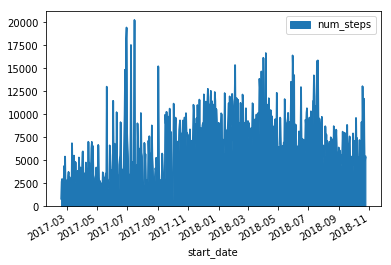

In [107]:
summed_df.plot(x='start_date', y='num_steps', kind='area')

In [115]:
summed_df.min()

start_date        2017-02-17 00:00:00
end_date          2017-02-17 00:00:00
start_time                          0
end_time                           24
num_steps                         612
duration                     0.718056
steps_per_hour                69.7172
dtype: object